In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

(512, 512, 3)


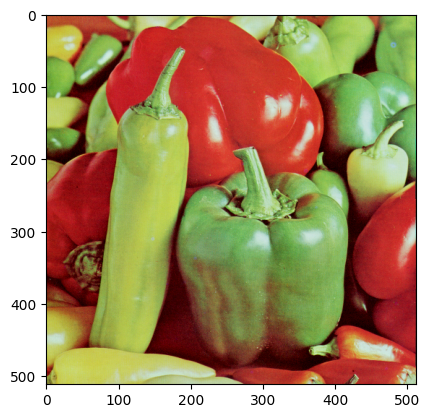

In [2]:
filename = 'peppers-large'
A = imread(filename + '.tiff')
print(A.shape)
plt.imshow(A)
plt.show()

In [3]:
def Kmeans(X, k, err=1e-8, max_iters = 1000, plot_iters = []):
    m,n = X.shape
    indexes = np.random.randint(low=0, high=m-1, size=k)
    centers = X[indexes,:].copy()
    
    for it in range(1,max_iters+1):
        # Class assignment
        distance = np.zeros((m,k))
        for i in range(k):
            distance[:, i] = np.linalg.norm(X - centers[i], axis=1)
        labels = np.argmin(distance, axis=1)
        # centers update
        old_centers = centers
        centers = np.zeros((k,n))
        for i in range(k):
            centers[i,:] = X[labels==i].mean(axis=0)
        if np.linalg.norm(centers - old_centers) < err:
            print(f"Converged in {it} iterations.")
            if len(plot_iters) > 0 and plot_iters[-1] == -1:
                plot(X, labels, centers, it)
            return labels, centers
        if it in plot_iters:
            plot(X, labels, centers, it)

Converged in 90 iterations.


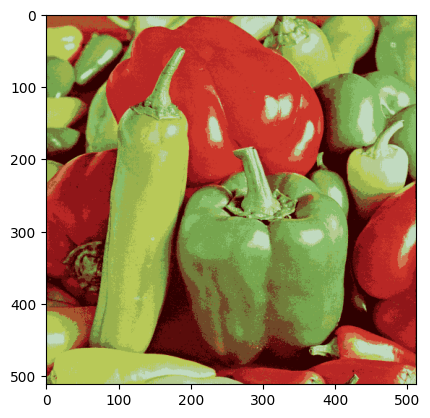

In [4]:
X = A.reshape(-1,3).copy()
k = 16
labels, centers = Kmeans(X, k)
# Replace each pixel's (r,g,b) values with the value of the closest cluster centroid
for i in range(k):
    X[labels == i,:] = centers[i]
A_compressed = X.reshape(A.shape)

plt.imshow(A_compressed)
plt.savefig(filename + "-compressed.png")
plt.show()

(b)

If we represent the image with these reduced (16) colors, originally we need 3 bytes (or 24 bits) to represent a pixel, now we only need 4 bits ($16 = 2^4$). So the compression factor is:

$$\frac{24}{4} = 6$$